In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:

# Define the URL of the page
url = "https://en.wikipedia.org/wiki/Machine_learning"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content of the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the text from all paragraph tags on the page
passage = " ".join([p.text for p in soup.find_all('p')])

# Now, let's perform the preprocessing steps:

# Define a simple list of stopwords
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
             "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
             "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
             "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
             "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
             "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for",
             "with", "about", "against", "between", "into", "through", "during", "before", "after", "above",
             "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
             "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
             "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only",
             "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
             "now"]

# Convert to lowercase
passage = passage.lower()

# Remove HTML tags using regex
passage = re.sub('<.*?>', '', passage)

# Remove special characters
passage = re.sub('[^a-z\s]', '', passage)

# Remove stopwords
passage = ' '.join(word for word in passage.split() if word not in stopwords)

# print only first 100 characters for brevity
print(passage[:100])

# Tokenize and convert to sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts([passage])
sequence = tokenizer.texts_to_sequences([passage])

print(sequence[0][:10])


machine learning ml umbrella term solving problems development algorithms human programmers would co
[2, 1, 176, 666, 113, 667, 27, 668, 5, 95]


In [ ]:
# print only first 500 characters for brevity
print(passage[:500])

machine learning ml umbrella term solving problems development algorithms human programmers would costprohibitive instead problems solved helping machines discover algorithms without needing explicitly told humandeveloped algorithms recently generative artificial neural networks able surpass results many previous approaches machine learning approaches applied large language models computer vision speech recognition email filtering agriculture medicine costly develop algorithms perform needed tas


In [ ]:
text = "Machine learning is fascinating. It is a field full of challenges!"
print(text)

# Define the tokenizer and fit it on the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

# Print out the word index to see how words are tokenized
print(tokenizer.word_index)


Machine learning is fascinating. It is a field full of challenges!
{'is': 1, 'machine': 2, 'learning': 3, 'fascinating': 4, 'it': 5, 'a': 6, 'field': 7, 'full': 8, 'of': 9, 'challenges': 10}


In [ ]:
# Convert the text to sequences
sequence = tokenizer.texts_to_sequences([text])
print(sequence)


[[2, 3, 1, 4, 5, 1, 6, 7, 8, 9, 10]]


In [ ]:
# Define the tokenizer and fit it on the text
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([text])
# Print out the character index to see how characters are tokenized
print(tokenizer.word_index)



{' ': 1, 'i': 2, 'a': 3, 'n': 4, 'l': 5, 'e': 6, 's': 7, 'f': 8, 'c': 9, 'g': 10, 'h': 11, 't': 12, 'm': 13, 'r': 14, '.': 15, 'd': 16, 'u': 17, 'o': 18, '!': 19}


In [ ]:
# Print out the character index to see how characters are tokenized
print(tokenizer.word_index)



{' ': 1, 'i': 2, 'a': 3, 'n': 4, 'l': 5, 'e': 6, 's': 7, 'f': 8, 'c': 9, 'g': 10, 'h': 11, 't': 12, 'm': 13, 'r': 14, '.': 15, 'd': 16, 'u': 17, 'o': 18, '!': 19}


In [ ]:
# Convert the text to sequences
sequence = tokenizer.texts_to_sequences([text])
print(sequence)


[[13, 3, 9, 11, 2, 4, 6, 1, 5, 6, 3, 14, 4, 2, 4, 10, 1, 2, 7, 1, 8, 3, 7, 9, 2, 4, 3, 12, 2, 4, 10, 15, 1, 2, 12, 1, 2, 7, 1, 3, 1, 8, 2, 6, 5, 16, 1, 8, 17, 5, 5, 1, 18, 8, 1, 9, 11, 3, 5, 5, 6, 4, 10, 6, 7, 19]]


In [ ]:
sentences = [
    "I love reading books.",
    "The cat sat on the mat.",
    "It's a beautiful day outside!",
    "Have you done your homework?"
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)



{'the': 1, 'i': 2, 'love': 3, 'reading': 4, 'books': 5, 'cat': 6, 'sat': 7, 'on': 8, 'mat': 9, "it's": 10, 'a': 11, 'beautiful': 12, 'day': 13, 'outside': 14, 'have': 15, 'you': 16, 'done': 17, 'your': 18, 'homework': 19}
[[2, 3, 4, 5], [1, 6, 7, 8, 1, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(sequences)
print(padded)


[[ 0  0  2  3  4  5]
 [ 1  6  7  8  1  9]
 [ 0 10 11 12 13 14]
 [ 0 15 16 17 18 19]]


In [ ]:
# post padding
padded_sequences = pad_sequences(sequences, padding='post')
print(padded_sequences)

[[ 2  3  4  5  0  0]
 [ 1  6  7  8  1  9]
 [10 11 12 13 14  0]
 [15 16 17 18 19  0]]


In [ ]:
sentences = [
    "I love reading books.",
    "The cat sat on the mat.",
    "It's a beautiful day outside!",
    "Have you done your homework?",
    "Machine Learning is a very interesting subject that enables you build amazing solutions beyond your imagination"
]

# Define the tokenizer and fit it on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Tokenize the sentences
sequences = tokenizer.texts_to_sequences(sentences)
# post padding
padded_sequences = pad_sequences(sequences, padding='post')
print(padded_sequences)

[[ 5  6  7  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9 10 11  1 12  0  0  0  0  0  0  0  0  0  0]
 [13  2 14 15 16  0  0  0  0  0  0  0  0  0  0  0]
 [17  3 18  4 19  0  0  0  0  0  0  0  0  0  0  0]
 [20 21 22  2 23 24 25 26 27  3 28 29 30 31  4 32]]


In [ ]:


# Define the max length
max_length = 10

# Pad the sequences
padded = pad_sequences(sequences, padding='post', maxlen=max_length)

print(padded)

[[ 5  6  7  8  0  0  0  0  0  0]
 [ 1  9 10 11  1 12  0  0  0  0]
 [13  2 14 15 16  0  0  0  0  0]
 [17  3 18  4 19  0  0  0  0  0]
 [25 26 27  3 28 29 30 31  4 32]]


In [ ]:
# Pad the sequences
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=max_length)

print(padded)


[[ 5  6  7  8  0  0  0  0  0  0]
 [ 1  9 10 11  1 12  0  0  0  0]
 [13  2 14 15 16  0  0  0  0  0]
 [17  3 18  4 19  0  0  0  0  0]
 [20 21 22  2 23 24 25 26 27  3]]


In [ ]:
# Define the tokenizer with an OOV token
tokenizer = Tokenizer(oov_token="<OOV>")
# Fit the tokenizer on the texts
tokenizer.fit_on_texts(sentences)
# Convert the texts to sequences
sequences = tokenizer.texts_to_sequences(sentences)
# Let's take a look at the word index
print(tokenizer.word_index)

{'<OOV>': 1, 'the': 2, 'a': 3, 'you': 4, 'your': 5, 'i': 6, 'love': 7, 'reading': 8, 'books': 9, 'cat': 10, 'sat': 11, 'on': 12, 'mat': 13, "it's": 14, 'beautiful': 15, 'day': 16, 'outside': 17, 'have': 18, 'done': 19, 'homework': 20, 'machine': 21, 'learning': 22, 'is': 23, 'very': 24, 'interesting': 25, 'subject': 26, 'that': 27, 'enables': 28, 'build': 29, 'amazing': 30, 'solutions': 31, 'beyond': 32, 'imagination': 33}


In [ ]:
# Define the max length
max_length = 10
# Pad the sequences
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=max_length)
print(padded)


[[ 6  7  8  9  0  0  0  0  0  0]
 [ 2 10 11 12  2 13  0  0  0  0]
 [14  3 15 16 17  0  0  0  0  0]
 [18  4 19  5 20  0  0  0  0  0]
 [21 22 23  3 24 25 26 27 28  4]]


In [ ]:
# Now let's convert a sentence with some OOV words
test_sentence = "I love playing chess"
test_sequence = tokenizer.texts_to_sequences([test_sentence])
print(test_sequence)


[[6, 7, 1, 1]]


In [ ]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index

# Create a new dictionary with keys and values swapped
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Function to convert sequences back to text
def sequence_to_text(sequence):
    # Use the reverse word index to convert tokens back to words
    return ' '.join([reverse_word_index.get(token, '?') for token in sequence])

# Convert all sequences back to text
original_sentences = [sequence_to_text(sequence) for sequence in sequences]

print(original_sentences)


['i love reading books', 'the cat sat on the mat', "it's a beautiful day outside", 'have you done your homework', 'machine learning is a very interesting subject that enables you build amazing solutions beyond your imagination']


#YELP POLARITY CASE STUDY

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import io
import matplotlib.pyplot as plt


In [ ]:
# Load the Yelp Polarity Reviews dataset
(train_dataset, test_dataset), dataset_info = tfds.load('yelp_polarity_reviews', split=['train', 'test'], shuffle_files=True, with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/560000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteL9G42R/yelp_polarity_reviews-train.t…

Generating test examples...:   0%|          | 0/38000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteL9G42R/yelp_polarity_reviews-test.tf…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


Exploratory data analyis

In [ ]:
def get_reviews(dataset, num_samples=5):
    reviews = []
    for text, label in dataset.take(num_samples):
        reviews.append((text.numpy().decode('utf-8'), label.numpy()))
    return reviews


In [ ]:
def dataset_insights(dataset, num_samples=2000):
    total_reviews = 0
    total_positive = 0
    total_negative = 0
    total_length = 0
    min_length = float('inf')
    max_length = 0

    for text, label in dataset.take(num_samples):
        total_reviews += 1
        review_length = len(text.numpy().decode('utf-8').split())
        total_length += review_length
        if review_length < min_length:
            min_length = review_length
        if review_length > max_length:
            max_length = review_length
        if label.numpy() == 1:
            total_positive += 1
        else:
            total_negative += 1

    avg_length = total_length / total_reviews
    return min_length, max_length, avg_length, total_positive, total_negative


In [ ]:
def plot_reviews(positive, negative):
    labels = ['Positive', 'Negative']
    counts = [positive, negative]
    plt.bar(labels, counts, color=['blue', 'red'])
    plt.xlabel('Review Type')
    plt.ylabel('Count')
    plt.title('Distribution of Reviews')
    plt.show()


In [ ]:
# Check out some reviews
print("Training Set Reviews:")
train_reviews = get_reviews(train_dataset, 7)
for review, label in train_reviews:
  #we keep only the first 100 characters for similplicty
  print(f"Label: {label}, Review: {review[:100]}...")

Training Set Reviews:
Label: 1, Review: If you want to be on the strip, this isn't the place for you.  I have never stayed on the strip in V...
Label: 1, Review: A great place to shop in Vegas, one of my favorite places to break my wallets in...\r\n\r\nI don't g...
Label: 1, Review: First time trying this place out...ordered the Aloha Chicken! :-) The food was pretty good...althoug...
Label: 0, Review: It was bad. My nails are ruined. I asked for purple and sparkles and they gave me nothing near that....
Label: 1, Review: My wife ordered bun tom thit nuong, also known as old #43 -   charbroiled shrimp & egg roll with ric...
Label: 1, Review: Great club! Patrons be weary . . . We attended this club when Diddy was hosting and everybody knows ...
Label: 1, Review: i really enjoy this place the last few times ive been here. the food is good, i do however wish the ...


In [ ]:
min_length, max_length, avg_length, total_positive, total_negative = dataset_insights(train_dataset)

# Display the results
print(f"Shortest Review Length: {min_length}")
print(f"Longest Review Length: {max_length}")
print(f"Average Review Length: {avg_length:.2f}")
print(f"Total Positive Reviews: {total_positive}")
print(f"Total Negative Reviews: {total_negative}")


Shortest Review Length: 1
Longest Review Length: 942
Average Review Length: 132.16
Total Positive Reviews: 1026
Total Negative Reviews: 974


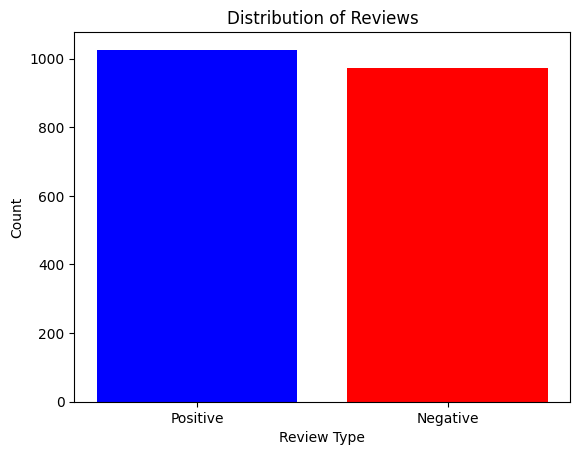

In [ ]:
plot_reviews(total_positive, total_negative)

In [ ]:
# Define parameters
vocab_size = 10000
embedding_dim = 16
max_length = 132
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs = 10

# Build the Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [ ]:

# Fetch and decode the training data
train_text = []
train_label = []
for example in train_dataset.take(20000):
  text, label = example
  train_text.append(text.numpy().decode('utf-8'))
  train_label.append(label.numpy())

# Convert labels to numpy array
train_labels = np.array(train_label)

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(train_text)

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_text)

# Fetch and decode the test data
test_text = []
test_label = []
for example in test_dataset.take(8000):
  text, label = example
  test_text.append(text.numpy().decode('utf-8'))
  test_label.append(label.numpy())

# Convert labels to numpy array
test_labels = np.array(test_label)

# Convert texts to sequences
test_sequences = tokenizer.texts_to_sequences(test_text)

# Pad the sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # because it's binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model

history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))
# Evaluate the model
results = model.evaluate(test_padded, test_labels, verbose=2)

print("Test Loss: ", results[0])
print("Test Accuracy: ", results[1])



Epoch 1/10
625/625 [==============================] - 63s 92ms/step - loss: 0.5151 - accuracy: 0.7599 - val_loss: 0.3407 - val_accuracy: 0.8766
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2699 - accuracy: 0.8972 - val_loss: 0.2891 - val_accuracy: 0.8775
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2108 - accuracy: 0.9218 - val_loss: 0.2741 - val_accuracy: 0.8978
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1759 - accuracy: 0.9355 - val_loss: 0.2783 - val_accuracy: 0.8956
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1501 - accuracy: 0.9469 - val_loss: 0.2924 - val_accuracy: 0.8917
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1293 - accuracy: 0.9551 - val_loss: 0.3149 - val_accuracy: 0.8875
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1116 - accuracy: 0.9638 - val_loss: 0.3330 - val_accuracy: 0.8880


In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()


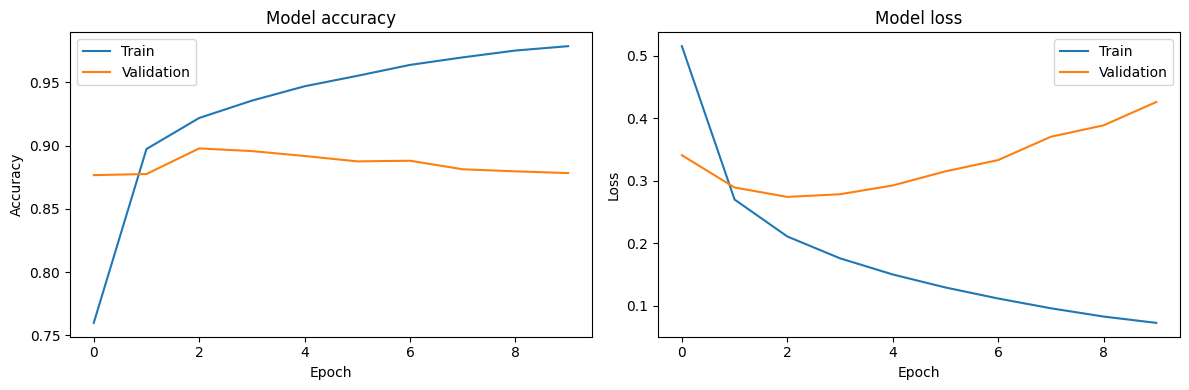

In [ ]:
plot_history(history)

In [ ]:
# New sentence
new_sentence = ["The restaurant was absolutely fantastic. The staff were kind and the food was delicious."]

# Preprocess the sentence in the same way as the training data
new_sequences = tokenizer.texts_to_sequences(new_sentence)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(new_padded)
# Use the model to predict the sentiment of the new sentence
prediction = model.predict(new_padded)

# Print out the prediction. Note that the output will be a float in the range [0, 1], which represents the probability of the sentence being positive.
print(prediction)


[[  2 106   7 512 548   2 124  27 295   3   2  32   7 184   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]]
1/1 [==============================] - 0s 17ms/step
[[0.9861252]]


In [ ]:
# To convert this into a binary sentiment prediction, we can check if the probability is greater than 0.5.
if prediction > 0.5:
  print("Positive sentiment")
else:
  print("Negative sentiment")

# New sentences
new_sentences = ["The restaurant was absolutely fantastic. The staff were kind and the food was delicious.",  # positive
                 "I've had an incredible day at the beach, the weather was beautiful.",  # positive
                 "The movie was a big disappointment. I wouldn't recommend it to anyone.",  # negative
                 "I bought a new phone and it stopped working after a week. Terrible product."]  # negative

# Preprocess the sentences in the same way as the training data
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Use the model to predict the sentiment of the new sentences
predictions = model.predict(new_padded)

# Print out the sequences and the corresponding predictions
for i in range(len(new_sentences)):
    print("Sequence:", new_sequences[i])
    print("Predicted sentiment (probability):", predictions[i])
    if predictions[i] > 0.5:
        print("Interpretation: Positive sentiment")
    else:
        print("Interpretation: Negative sentiment")
    print("\n")

Positive sentiment
1/1 [==============================] - 0s 20ms/step
Sequence: [2, 106, 7, 512, 548, 2, 124, 27, 295, 3, 2, 32, 7, 184]
Predicted sentiment (probability): [0.9861252]
Interpretation: Positive sentiment


Sequence: [112, 25, 60, 1219, 149, 26, 2, 3420, 2, 2026, 7, 644]
Predicted sentiment (probability): [0.9916637]
Interpretation: Positive sentiment


Sequence: [2, 1124, 7, 6, 224, 1120, 4, 460, 232, 9, 5, 498]
Predicted sentiment (probability): [0.12388425]
Interpretation: Negative sentiment


Sequence: [4, 737, 6, 161, 441, 3, 9, 675, 517, 83, 6, 390, 472, 1441]
Predicted sentiment (probability): [0.08920211]
Interpretation: Negative sentiment




In [ ]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = tokenizer.word_index
print(weights.shape)  # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for word, index in vocab.items():
    if index < vocab_size:
        vec = weights[index]
        out_v.write('\t'.join([str(x) for x in vec]) + "\n")
        out_m.write(word + "\n")

out_v.close()
out_m.close()

In [ ]:
try:
    from google.colab import files
    files.download('vectors.tsv')
    files.download('metadata.tsv')
except Exception:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def sentiment_model(vocab_size, embedding_dim, training_size, num_epochs):
    # Constants
    max_length = 132
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"

    # Build the Tokenizer
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

    # Fetch and decode the training data
    train_text = []
    train_label = []
    for example in train_dataset.take(training_size):
        text, label = example
        train_text.append(text.numpy().decode('utf-8'))
        train_label.append(label.numpy())

    # Convert labels to numpy array
    train_labels = np.array(train_label)

    # Fit the tokenizer on the training texts
    tokenizer.fit_on_texts(train_text)

    # Convert texts to sequences
    train_sequences = tokenizer.texts_to_sequences(train_text)

    # Fetch and decode the test data
    test_text = []
    test_label = []
    for example in test_dataset.take(8000):
        text, label = example
        test_text.append(text.numpy().decode('utf-8'))
        test_label.append(label.numpy())

    # Convert labels to numpy array
    test_labels = np.array(test_label)

    # Convert texts to sequences
    test_sequences = tokenizer.texts_to_sequences(test_text)

    # Pad the sequences
    train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # because it's binary classification
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

    # Evaluate the model
    results = model.evaluate(test_padded, test_labels, verbose=2)

    print("Test Loss: ", results[0])
    print("Test Accuracy: ", results[1])

    return model, history



#Increase the vocabulary size

In [ ]:
# Increasing the vocab_size
vocab_size = 10000 #Change from 10000 to 20000
embedding_dim = 16
training_size = 10000
num_epochs=10

model, history = sentiment_model(vocab_size, embedding_dim, training_size, num_epochs)

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 0.6283 - accuracy: 0.6865 - val_loss: 0.4930 - val_accuracy: 0.7885
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.8651 - val_loss: 0.3363 - val_accuracy: 0.8720
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2512 - accuracy: 0.9105 - val_loss: 0.3003 - val_accuracy: 0.8814
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1969 - accuracy: 0.9325 - val_loss: 0.2969 - val_accuracy: 0.8814
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1592 - accuracy: 0.9471 - val_loss: 0.2987 - val_accuracy: 0.8845
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.1301 - accuracy: 0.9564 - val_loss: 0.3086 - val_accuracy: 0.8859
Epoch 7/10
313/313 [==============================] - 1s 5ms/step - loss: 0.1064 - accuracy: 0.9666 - val_loss: 0.3273 - val_accuracy: 0.8823
Epoch 

#Increase the embedding dimension

In [ ]:
vocab_size = 10000
embedding_dim = 32 #Change from 16 to 32
train_size = 20000
num_epochs=10

model_2, history_2 = sentiment_model(vocab_size, embedding_dim, train_size, num_epochs)


Epoch 1/10
625/625 [==============================] - 55s 79ms/step - loss: 0.4719 - accuracy: 0.7841 - val_loss: 0.3152 - val_accuracy: 0.8814
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2498 - accuracy: 0.9052 - val_loss: 0.2832 - val_accuracy: 0.8925
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.1947 - accuracy: 0.9280 - val_loss: 0.2812 - val_accuracy: 0.8942
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1619 - accuracy: 0.9428 - val_loss: 0.3017 - val_accuracy: 0.8796
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1351 - accuracy: 0.9534 - val_loss: 0.3131 - val_accuracy: 0.8882
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1156 - accuracy: 0.9619 - val_loss: 0.3605 - val_accuracy: 0.8827
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0973 - accuracy: 0.9682 - val_loss: 0.3661 - val_accuracy: 0.8819
E

#Add more training data

In [ ]:
vocab_size = 10000
embedding_dim = 16
train_size = 20000 #Change from 20,000 to 40,000
num_epochs=10

model_3, history_3 = sentiment_model(vocab_size, embedding_dim, train_size, num_epochs)


Epoch 1/10
625/625 [==============================] - 55s 79ms/step - loss: 0.5177 - accuracy: 0.7591 - val_loss: 0.3414 - val_accuracy: 0.8750
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2712 - accuracy: 0.8978 - val_loss: 0.2818 - val_accuracy: 0.8925
Epoch 3/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2127 - accuracy: 0.9216 - val_loss: 0.2725 - val_accuracy: 0.8947
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 0.1775 - accuracy: 0.9359 - val_loss: 0.2845 - val_accuracy: 0.8949
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.1513 - accuracy: 0.9456 - val_loss: 0.2948 - val_accuracy: 0.8923
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1300 - accuracy: 0.9559 - val_loss: 0.3138 - val_accuracy: 0.8894
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1121 - accuracy: 0.9625 - val_loss: 0.3457 - val_accuracy: 0.8841
E

#Drop out regularization

In [ ]:
model_4  = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model
num_epochs = 10
history = model_4.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))
# Evaluate the model
results = model_4.evaluate(test_padded, test_labels, verbose=2)

print("Test Loss: ", results[0])
print("Test Accuracy: ", results[1])

Epoch 1/10
625/625 [==============================] - 41s 63ms/step - loss: 0.5687 - accuracy: 0.7204 - val_loss: 0.3736 - val_accuracy: 0.8687
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3318 - accuracy: 0.8724 - val_loss: 0.2885 - val_accuracy: 0.8913
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2617 - accuracy: 0.9078 - val_loss: 0.2720 - val_accuracy: 0.8978
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2202 - accuracy: 0.9248 - val_loss: 0.2848 - val_accuracy: 0.8896
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1947 - accuracy: 0.9362 - val_loss: 0.2822 - val_accuracy: 0.8910
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1761 - accuracy: 0.9447 - val_loss: 0.2962 - val_accuracy: 0.8906
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1532 - accuracy: 0.9543 - val_loss: 0.3129 - val_accuracy: 0.8894
Epo

#Try a different optimizer

In [ ]:
model_5  = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Initialize the optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
# Compile the model
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# Train the model
num_epochs = 10
model_5.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Epoch 1/10
625/625 [==============================] - 38s 59ms/step - loss: 0.6410 - accuracy: 0.6589 - val_loss: 0.5309 - val_accuracy: 0.7694
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.4136 - accuracy: 0.8332 - val_loss: 0.3562 - val_accuracy: 0.8612
Epoch 3/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3010 - accuracy: 0.8807 - val_loss: 0.3045 - val_accuracy: 0.8825
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.2599 - accuracy: 0.8986 - val_loss: 0.2903 - val_accuracy: 0.8859
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.2356 - accuracy: 0.9105 - val_loss: 0.2827 - val_accuracy: 0.8910
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2196 - accuracy: 0.9186 - val_loss: 0.2842 - val_accuracy: 0.8938
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2075 - accuracy: 0.9233 - val_loss: 0.2842 - val_accuracy: 0.8938
Ep

In [ ]:
# Evaluate the model
results = model_5.evaluate(test_padded, test_labels, verbose=2)

print("Test Loss: ", results[0])
print("Test Accuracy: ", results[1])

250/250 - 1s - loss: 0.2885 - accuracy: 0.8920 - 599ms/epoch - 2ms/step
Test Loss:  0.2884712219238281
Test Accuracy:  0.8920000195503235
